In [1]:
import xarray as xr
import numpy as np
import more_itertools as mit
from itertools import groupby
import glob
import datetime as dt 
#import vor_fast
#import vor_fast_setup
import pandas as pd
import sys
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
!pip install --user more-itertools

In [12]:
grouped.groups

{Timestamp('2023-11-01 00:00:00'): 92, Timestamp('2024-02-01 00:00:00'): 152}

In [2]:
filepaths1=[]
root_path = '/work/bd1022/from_Mistral/bd1022/b381258/ERA5/'
for filepath1 in glob.iglob(f'{root_path}*ua*'):
    filepaths1.append(filepath1)
filepaths1.sort()

# filepaths to obtain 10hPa GPH for northern hemisphere
filepaths2=[]
for filepath2 in glob.iglob(f'{root_path}*moments*'):
    filepaths2.append(filepath2)
filepaths2.sort()

In [6]:
!ls /work/bd1022/from_Mistral/bd1022/b381258/ERA5

E5pl00_1D_1979-01_129.nc  E5pl00_1D_1997-08_129.nc
E5pl00_1D_1979-01_131.nc  E5pl00_1D_1997-08_131.nc
E5pl00_1D_1979-02_129.nc  E5pl00_1D_1997-09_129.nc
E5pl00_1D_1979-02_131.nc  E5pl00_1D_1997-09_131.nc
E5pl00_1D_1979-03_129.nc  E5pl00_1D_1997-10_129.nc
E5pl00_1D_1979-03_131.nc  E5pl00_1D_1997-10_131.nc
E5pl00_1D_1979-04_129.nc  E5pl00_1D_1997-11_129.nc
E5pl00_1D_1979-04_131.nc  E5pl00_1D_1997-11_131.nc
E5pl00_1D_1979-05_129.nc  E5pl00_1D_1997-12_129.nc
E5pl00_1D_1979-05_131.nc  E5pl00_1D_1997-12_131.nc
E5pl00_1D_1979-06_129.nc  E5pl00_1D_1998-01_129.nc
E5pl00_1D_1979-06_131.nc  E5pl00_1D_1998-01_131.nc
E5pl00_1D_1979-07_129.nc  E5pl00_1D_1998-02_129.nc
E5pl00_1D_1979-07_131.nc  E5pl00_1D_1998-02_131.nc
E5pl00_1D_1979-08_129.nc  E5pl00_1D_1998-03_129.nc
E5pl00_1D_1979-08_131.nc  E5pl00_1D_1998-03_131.nc
E5pl00_1D_1979-09_129.nc  E5pl00_1D_1998-04_129.nc
E5pl00_1D_1979-09_131.nc  E5pl00_1D_1998-04_131.nc
E5pl00_1D_1979-10_129.nc  E5pl00_1D_1998-05_129.nc
E5pl00_1D_1979-10_131.nc  E5pl0

In [9]:
xr.__version__

'2023.4.2'

In [9]:
for date in pd.date_range('1979-01-01', '2015-12-31', freq = '1M'):
    date_s = date.strftime('%Y-%m')
    print(date_s)
    infile = f'{root_path}{sub_dir}E5pl00_1D_{date_s}_{variable}.nc'
    ds = xr.open_dataset(infile)

1979-01
1979-02
1979-03
1979-04
1979-05
1979-06
1979-07
1979-08
1979-09
1979-10
1979-11
1979-12
1980-01
1980-02
1980-03
1980-04
1980-05
1980-06
1980-07
1980-08
1980-09
1980-10
1980-11
1980-12
1981-01
1981-02
1981-03
1981-04
1981-05
1981-06
1981-07
1981-08
1981-09
1981-10
1981-11
1981-12
1982-01
1982-02
1982-03
1982-04
1982-05
1982-06
1982-07
1982-08
1982-09
1982-10
1982-11
1982-12
1983-01
1983-02
1983-03
1983-04
1983-05
1983-06
1983-07
1983-08
1983-09
1983-10
1983-11
1983-12
1984-01
1984-02
1984-03
1984-04
1984-05
1984-06
1984-07
1984-08
1984-09
1984-10
1984-11
1984-12
1985-01
1985-02
1985-03
1985-04
1985-05
1985-06
1985-07
1985-08
1985-09
1985-10
1985-11
1985-12
1986-01
1986-02
1986-03
1986-04
1986-05
1986-06
1986-07
1986-08
1986-09
1986-10
1986-11
1986-12
1987-01
1987-02
1987-03
1987-04
1987-05
1987-06
1987-07
1987-08
1987-09
1987-10
1987-11
1987-12
1988-01
1988-02
1988-03
1988-04
1988-05
1988-06
1988-07
1988-08
1988-09
1988-10
1988-11
1988-12
1989-01
1989-02
1989-03
1989-04
1989-05


In [6]:
!ls /work/bd1022/from_Mistral/bd1022/b381258/ERA5/E5pl00_1D_*131.nc | wc

    444     444   31524


In [12]:
ds

<xarray.Dataset>
Dimensions:  (time: 31, lon: 1, lat: 1, plev: 1)
Coordinates:
  * time     (time) float64 2.015e+07 2.015e+07 ... 2.015e+07 2.015e+07
  * lon      (lon) float64 0.0
  * lat      (lat) float64 60.0
  * plev     (plev) float64 1e+03
Data variables:
    U        (time, plev, lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Sat Apr 29 23:45:10 2023: cdo -zonmean -sellevel,1000 -sell...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...

In [3]:
sub_dir=''
variable=131
infiles = f'{root_path}{sub_dir}E5pl00_1D_*{variable}.nc'
print(infiles)

kwargs = dict(decode_times = False) 

ds = xr.open_mfdataset(
    infiles, 
    parallel = True,
    concat_dim = 'time',
    combine='nested',
    data_vars='minimal', coords='minimal', 
    **kwargs 
    #chunks = {"time": 10}
)#.chunk({'time': 30})
ds['time'] = pd.date_range('1979-01-01', '2015-12-31', freq = '1D')
ds

/work/bd1022/from_Mistral/bd1022/b381258/ERA5/E5pl00_1D_*131.nc


<xarray.Dataset>
Dimensions:  (time: 13514, lon: 1, lat: 1, plev: 1)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2015-12-31
  * lon      (lon) float64 0.0
  * lat      (lat) float64 60.0
  * plev     (plev) float64 1e+03
Data variables:
    U        (time, plev, lat, lon) float32 dask.array<chunksize=(31, 1, 1, 1), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Sat Apr 29 21:21:10 2023: cdo -zonmean -sellevel,1000 -sell...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...

In [4]:
winter_month_ls = [11,12,1,2,3,4]

ds_sel = ds.sel(
    time = np.isin(
        ds.time.dt.month, 
        winter_month_ls
    )
).squeeze().sel(time = slice(None,'2014')).load()
ds_sel

<xarray.Dataset>
Dimensions:  (time: 6525)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2014-12-31
    lon      float64 0.0
    lat      float64 60.0
    plev     float64 1e+03
Data variables:
    U        (time) float32 51.74 51.39 51.69 52.7 ... 37.39 35.08 31.1 23.28
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      Sat Apr 29 21:21:10 2023: cdo -zonmean -sellevel,1000 -sell...
    CDO:          Climate Data Operators version 2.0.6 (https://mpimet.mpg.de...

In [2]:
#filename2 = f'{root_path}{sub_dir}ERA5_moments@10and50and100hPa_NHonly.nc'
filename2 = f'/work/bd1022/b381258/ERA5/ERA5_moments@10hPa_NHonly_includingApril.nc'
moments = xr.open_dataset(filename2).sel(time = slice(None,'2014'))#.sel(plev = 1000)
#moments = moments.convert_calendar('noleap')
moments

<xarray.Dataset>
Dimensions:             (time: 6525)
Coordinates:
  * time                (time) datetime64[ns] 1979-01-01 ... 2014-12-31
    plev                float64 ...
Data variables:
    angle               (time) float64 ...
    aspect_ratio        (time) float64 ...
    objective_area      (time) float64 ...
    kurtosis            (time) float64 ...
    centroid_latitude   (time) float64 ...
    centroid_longitude  (time) float64 ...

In [16]:
30+31+31+28+31

151

In [14]:
moments.sel(time = '2000-02')

<xarray.Dataset>
Dimensions:             (time: 29)
Coordinates:
  * time                (time) datetime64[ns] 2000-02-01 ... 2000-02-29
    plev                float64 ...
Data variables:
    angle               (time) float64 ...
    aspect_ratio        (time) float64 ...
    objective_area      (time) float64 ...
    kurtosis            (time) float64 ...
    centroid_latitude   (time) float64 ...
    centroid_longitude  (time) float64 ...

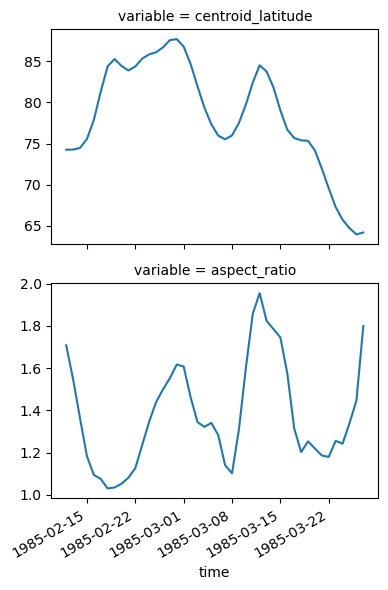

In [47]:
date_sel = pd.to_datetime('1985-03-24')
td = pd.Timedelta('40D')
date_start = date_sel -td
date_end = date_sel+td
moments[['centroid_latitude','aspect_ratio']].sel(time = slice(date_start,date_end)).to_array().plot(x = 'time', row = 'variable', sharey = False)

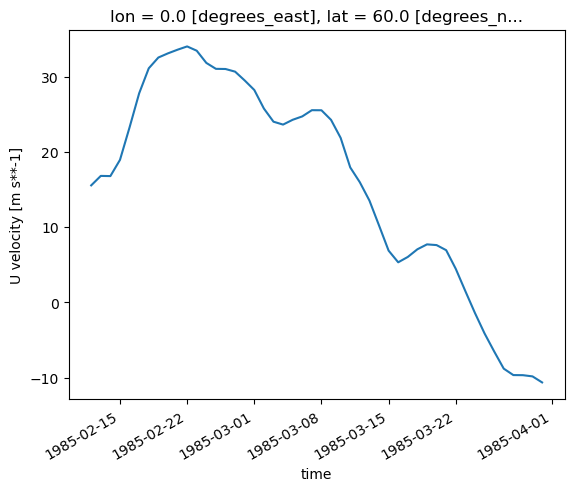

In [48]:
ds_sel['U'].sel(time = slice(date_start,date_end)).plot()

In [8]:
temp_sel

<xarray.DataArray 'U' (time: 151)>
dask.array<getitem, shape=(151,), dtype=float32, chunksize=(31,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2014-01-01 2014-01-02 ... 2014-12-31
    lon      float64 0.0
    lat      float64 60.0
    plev     float64 1e+03
Attributes:
    long_name:         U velocity
    units:             m s**-1
    code:              131
    table:             128
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  320

In [23]:
temp_sel

<xarray.DataArray 'U' (time: 151)>
dask.array<concatenate, shape=(151,), dtype=float32, chunksize=(31,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2012-12-01 2012-12-02 ... 2013-04-30
    lon      float64 0.0
    lat      float64 60.0
    plev     float64 1e+03
Attributes:
    long_name:         U velocity
    units:             m s**-1
    code:              131
    table:             128
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  320

In [62]:
temp = ds_sel['U']

temp_sel_ls = []
for year in range(1979,2015):
    #print(year)
    JFMA = temp.sel(time = slice(f'{year}-01',f'{year}-4'))
    try:
        ND = temp.sel(time = f'{year-1}-11')
        temp_sel = xr.concat([ND,JFMA], dim = 'time')
    except:
        temp_sel = xr.concat([JFMA], dim = 'time')
    temp_sel['label'] = f'NDJFMA_{year}'
    temp_sel_ls.append(temp_sel)
        
        
temp_sel_all = xr.concat(temp_sel_ls, dim = 'label')    
temp_sel_all
    
    #print(temp_all)

<xarray.DataArray 'U' (label: 36, time: 5379)>
array([[ 51.743317,  51.39232 ,  51.69148 , ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ..., -10.007022, -10.045717,
         -9.552811]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2014-04-30
    lon      float64 0.0
    lat      float64 60.0
    plev     float64 1e+03
  * label    (label) <U11 'NDJFMA_1979' 'NDJFMA_1980' ... 'NDJFMA_2014'
Attributes:
    long_name:         U velocity
    units:             m s**-1
    code:              131
    table:             128
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  320

In [33]:
temp_sel_ls[0].mean().values

array(15.875111, dtype=float32)

In [35]:
temp_sel_all.mean('time')[0].values

array(15.875111, dtype=float32)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

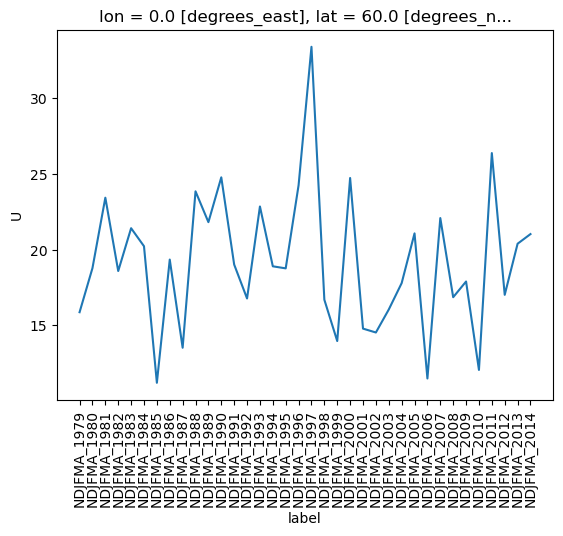

In [38]:
temp_sel_all.mean('time').plot()
plt.xticks(rotation = 90)

In [6]:
model = 'ERA5'
temp = ds_sel['U']
out_dir = './SSWs_stats/'

vortex_class=[]
SSW_dates=[]
temp_sel_ls = []
for year in range(1979,2015):
    #print(year)
    JFMA_dict = dict(time = slice(f'{year}-01',f'{year}-04'))
    ND_dict = dict(time = slice(f'{year-1}-11',f'{year-1}-12'))
    
    JFMA = temp.sel(**JFMA_dict)
    try:
        ND = temp.sel(**ND_dict)
        temp_sel = xr.concat([ND,JFMA], dim = 'time')
    except:
        temp_sel = xr.concat([JFMA], dim = 'time')
    temp_sel['label'] = f'NDJFMA_{year}'
    temp_sel_ls.append(temp_sel)

    aspect = np.empty(0)
    latcent = np.empty(0)       

    print(year,len(temp_sel))   


    idx=np.where(temp_sel<0)

#group the indices into events
    events=[list(group) for group in mit.consecutive_groups(idx[0])]
    #print(events)
    if not (events):
        print ('no events')
        continue

# check last event is not a final warming. If it is, remove
    if events[-1][-1] >len(temp_sel)-10:
        del events[-1]
    if not (events):
        print ('no events')
        continue
# check that there are at least 10 consecutive days of westerlies at some point after last remaining event
    if len(events)==1:
        idx_end=np.where(temp_sel[events[0][-1]+1:-1]>0)
        events_end=[list(group) for group in mit.consecutive_groups(idx_end[0])]
        if len(events_end[0])<10:
            del events[0]
    else:
        for i in range(len(events)-1,0,-1):
            idx_end=np.where(temp_sel[events[i][-1]+1:-1]>0)
            events_end=[list(group) for group in mit.consecutive_groups(idx_end[0])]
            consec_pos=[]
            for k in range (0,len(events_end)):
                length=len(events_end[k])
                consec_pos.append(length)
            if all (ele <10 for ele in consec_pos):
                del events[i]

# delete any events starting in April or November
    months=[]
    for e in range(0,len(events)):
        mon=int(temp_sel.time[events[e][0]].dt.strftime('%m'))
        months.append(mon)

    remove=[]
    for e in range(0,len(events)):
        if months[e]==4 or months[e]==11:
            remove.append(e)

    for index in sorted(remove,reverse=True):
        del events[index]
    #print(events)

    if not (events):
        print ('no events')

#for  events, check if 20 consecutive days of westerlies before events
    remove=[]
    for j in np.arange(len(events)):
        if np.any(temp_sel[events[j][0]-20:events[j][0]]<0):
            remove.append(j)
    print('to remove= ', remove)

    for index in sorted(remove,reverse=True):
        del events[index]
    #print(events)

    if not (events):
        print ('no events')

#final check for last event, does it have 10 consecutive days of westerlies afterwards
    if len(events)>0:
        idx_end=np.where(temp_sel[events[-1][-1]+1:-1]>0)
        events_end=[list(group) for group in mit.consecutive_groups(idx_end[0])]
        consec_pos=[]
        for k in range (0,len(events_end)):
            length=len(events_end[k])
            consec_pos.append(length)
        if all (ele <10 for ele in consec_pos):
            del events[-1]

    elif not (events):
        print ('no events')

#extract the onset dates from the events
    event_length=[]
    start_idx=[]
    for i in range(0,len(events)):
        start=events[i][0]
        length=len(events[i])
        start_idx.append(start)
        event_length.append(length)

    #print('indices of onset dates=',start_idx)
    #print('event lengths=',event_length)

    onset_dates=temp_sel.time[start_idx].values
    print('onset dates =',onset_dates)
    #sys.exit()
    #using vortex moments classify vortex as split, displacement or unclassifiable
    #NB calculate vorTex edge for each model separately and add below
    vortex_ID=[]
    moments_ens_sel = moments.sel(time = temp_sel.time)
    for idx in range(0,len(start_idx)):
        date_ind=start_idx[idx]
        print(date_ind)
        
        aspect = np.empty(0)
        latcent = np.empty(0) 

        
        
        

        for iday in range(date_ind-10,date_ind+11):
            aspect = np.append(aspect, moments_ens_sel['aspect_ratio'].isel(time = iday))
            latcent = np.append(latcent, moments_ens_sel['centroid_latitude'].isel(time = iday))

        print(aspect)
        print(latcent)
        aspect_days=np.count_nonzero(aspect>2.4)
        latcent_days=np.count_nonzero(latcent<66)
        print('days above aspect threshold=',aspect_days)
        print('days below latcent threshold=',latcent_days)
        vortex_type=[]
        if aspect_days > latcent_days:
            vortex_type ="split"
        elif aspect_days < latcent_days:
            vortex_type = "displaced"
        else:
            vortex_type = "unclassified"




        vortex_ID.append(vortex_type)

    SSW_dates.extend(onset_dates)
    vortex_class.extend(vortex_ID)

    #sys.exit()
print('SSW dates are:',SSW_dates)
print('vortex types:', vortex_class)
print(len(SSW_dates))

# make dataframe of results for model
model_SSWs=pd.DataFrame()
model_SSWs['onset dates']=SSW_dates
model_SSWs['vortex type']=vortex_class
model_SSWs.to_csv(f'{out_dir}{model}.csv')

split_model=model_SSWs[(model_SSWs['vortex type']=='split')]
disp_model=model_SSWs[(model_SSWs['vortex type']=='displaced')]
unclass_model=model_SSWs[(model_SSWs['vortex type']=='unclassified')]
#unavail_model=model_SSWs[(model_SSWs['vortex type']==f'{ens} N/A')]

split_dates=np.array(split_model['onset dates'])
disp_dates=np.array(disp_model['onset dates'])
unclass_dates=np.array(unclass_model['onset dates'])
#unavail_dates=np.array(unavail_model['onset dates'])

#save SSW dates as .npy files for use in subsequent code.
np.save(f'{out_dir}{model}_split_dates_all.npy',split_dates)
np.save(f'{out_dir}{model}_disp_dates_all.npy',disp_dates)
np.save(f'{out_dir}{model}_unclass_dates_all.npy',unclass_dates)
np.save(f'{out_dir}{model}_all_SSW_dates.npy',SSW_dates)

print('number of displacements: ',len(disp_dates))
print('number of splits: ',len(split_dates))
print('number of unclassified: ',len(unclass_dates))
#print('number of N/A: ',len(unavail_dates))

1979 120
to remove=  []
onset dates = ['1979-02-22T00:00:00.000000000']
52
[1.49774967 1.56507011 1.70444281 1.76719279 1.88457011 2.18835329
 2.60775255 2.9444468  2.96638119 2.80251611 2.94875588 3.21317788
 3.85224407 5.17138084 4.97973701 3.94692904 3.69822215 1.73598128
 1.59323635 1.77405752 2.14866065]
[74.71257708 75.38153443 76.8264879  78.51427054 80.03990578 80.49603519
 79.87192227 77.20745806 73.04162077 71.73440803 71.93842477 72.97872797
 75.90846553 81.63424273 80.54549254 75.29988913 70.12922907 64.30465778
 66.59582726 72.5038648  80.63690343]
days above aspect threshold= 11
days below latcent threshold= 1
1980 182
to remove=  [1, 2]
onset dates = ['1980-02-29T00:00:00.000000000']
120
[2.17512015 1.82633444 1.63261471 1.50514285 1.37000842 1.30342233
 1.36586141 1.42576734 1.31134876 1.10082705 1.28359842 1.78627211
 2.02951948 1.75553718 1.57087394 1.40294791 1.39957426 1.48146232
 1.63817498 1.65993295 1.55932735]
[75.07634476 73.74867533 73.11658462 72.96989265 71.

In [1]:
14/35*10

4.0

In [1]:
10/35*10

2.8571428571428568

In [78]:
14/10

1.4

In [74]:
14/35

0.4

In [4]:
24/36*10

6.666666666666666

In [2]:
25/36*10

6.944444444444445

In [69]:
date_ind

52

In [76]:
model_SSWs.groupby('vortex type').count()/35*10

,onset dates
vortex type,
displaced,4.000000
split,2.857143
unclassified,0.285714


In [49]:
model_SSWs.groupby('vortex type').count()#/35*10

,onset dates
vortex type,
displaced,19
split,9
unclassified,3


In [51]:
model_SSWs.groupby('vortex type').count()/35*10

,onset dates
vortex type,
displaced,5.428571
split,2.571429
unclassified,0.857143


In [57]:
5.428571+2.571429

8.0

In [52]:
(19-4)/35*10

4.285714285714286

In [54]:
(19-4)/35*10+2.571429

6.857143285714286

In [23]:
def mode_func(aspect, latcent, printing = False):
    #for latcent, cube the values to transform the distribution
    latcent3=np.power(latcent,3)
    #fit Gaussian distribution and use KS test for fit
    dist=getattr(stats,'norm')
    parameters=dist.fit(latcent3)
    (mean,SD)=parameters
    ks_stat,ks_pval=stats.kstest(latcent3,"norm",parameters)
    # convert latitude back (cube root)
    mode=np.power(mean,1/3)
    if printing:
        print('latcent mode:',mode)
        print('norm KS statistic and p value:',ks_stat,ks_pval)

    #fit GEV to aspect data
    dist2=getattr(stats,'genextreme')
    parameters=dist2.fit(aspect)
    (shape,location,scale)=parameters
    ks_stat_GEV,ks_pval_GEV = stats.kstest(aspect,"genextreme",parameters)
    if printing:
        print('location:', location)
        print(' GEV KS statistic and p value:',ks_stat_GEV,ks_pval_GEV)

    #aspect mode calculated according to Seviour et al. 2016 (S16)
    asp_params=stats.genextreme.fit(aspect)
    asp_pdf=stats.genextreme.pdf(aspect,asp_params[0],loc=asp_params[1],scale=asp_params[2])
    index=np.argmax(asp_pdf)
    max_asp_S16=aspect[index]
    if printing:
        print ('S16 aspect:',max_asp_S16)

    #kde alternative
    # aspect
    min_val=1
    max_val=int(np.round(np.max(aspect))+1)
    
    divs=(max_val-min_val)*100
    
    asp_xs=np.linspace(min_val,max_val,divs)
    asp_density=stats.gaussian_kde(aspect)
    asp_ys=asp_density(asp_xs)
    index=np.argmax(asp_ys)
    max_asp_kde=asp_xs[index]

    #latcent
    min1=int(np.round(np.min(latcent))-1)
    max1=90
    divs1=(max1-min1)*100

    lat_xs=np.linspace(min1,max1,divs1)
    lat_density=stats.gaussian_kde(latcent)
    lat_ys=lat_density(lat_xs)
    index1=np.argmax(lat_ys)
    max_lat_kde=lat_xs[index1]
    if printing:
        print ('kde aspect:',max_asp_kde)
        print ('kde latcent:',max_lat_kde)
    
    return max_asp_S16,mode


def mode_func_lat(latcent):
    latcent3=np.power(latcent,3)
    #fit Gaussian distribution and use KS test for fit
    dist=getattr(stats,'norm')
    parameters=dist.fit(latcent3)
    (mean,SD)=parameters
    ks_stat,ks_pval=stats.kstest(latcent3,"norm",parameters)
    # convert latitude back (cube root)
    mode=np.power(mean,1/3)
    return mode

def mode_func_aspect(aspect):
    asp_params=stats.genextreme.fit(aspect)
    asp_pdf=stats.genextreme.pdf(aspect,asp_params[0],loc=asp_params[1],scale=asp_params[2])
    index=np.argmax(asp_pdf)
    max_asp_S16=aspect[index]
    return max_asp_S16

In [8]:

aspect = moments['aspect_ratio']
latcent =  moments['centroid_latitude']

aspect=aspect[np.logical_not(np.isnan(aspect))]
aspect=aspect[aspect < float('+inf')]
aspect=aspect[aspect < 100.0]
latcent=latcent[np.logical_not(np.isnan(latcent))]
latcent=latcent[latcent < float('+inf')]        

mode_aspect, mode_latcent = mode_func(aspect.values, latcent.values)
print()


mode_aspect_da = xr.DataArray(mode_aspect)
mode_aspect_da.name = 'mode_aspect'
mode_latcent_da = xr.DataArray(mode_latcent)
mode_latcent_da.name = 'mode_latcent' 

ds_mode = xr.merge([mode_aspect_da, mode_latcent_da])
ds_mode.to_netcdf(f'{out_dir}{model}_modes_nc')

latcent mode: 77.26459753570796
norm KS statistic and p value: 0.020706282412768895 0.01377348231611845
location: 1.3464606615344379
 GEV KS statistic and p value: 0.021973589569153962 0.007356324027527251
S16 aspect: 1.2868586137036173
kde aspect: 1.3003003003003002
kde latcent: 77.87762306334577



In [13]:

aspect = moments['aspect_ratio']
latcent =  moments['centroid_latitude']

aspect=aspect[np.logical_not(np.isnan(aspect))]
aspect=aspect[aspect < float('+inf')]
aspect=aspect[aspect < 100.0]
latcent=latcent[np.logical_not(np.isnan(latcent))]
latcent=latcent[latcent < float('+inf')]        

mode_aspect, mode_latcent = mode_func(aspect.values, latcent.values, printing = True)
print()


mode_aspect_da = xr.DataArray(mode_aspect)
mode_aspect_da.name = 'mode_aspect'
mode_latcent_da = xr.DataArray(mode_latcent)
mode_latcent_da.name = 'mode_latcent' 

#ds_mode = xr.merge([mode_aspect_da, mode_latcent_da])
#ds_mode.to_netcdf(f'{out_dir}{model}_modes_nc')

latcent mode: 77.26459753570796
norm KS statistic and p value: 0.020706282412768895 0.01377348231611845
location: 1.3464606615344379
 GEV KS statistic and p value: 0.021973589569153962 0.007356324027527251
S16 aspect: 1.2868586137036173
kde aspect: 1.3003003003003002
kde latcent: 77.87762306334577



In [17]:
data = (latcent.values,) # aspect.values,
res = stats.bootstrap(data, mode_func_lat, confidence_level=0.68, method = 'basic', vectorized = False, n_resamples = 1000)
res.confidence_interval

ConfidenceInterval(low=77.12569550732209, high=77.39958555069424)

In [24]:
%%time
data = (latcent.values,) # aspect.values,
res_lat = stats.bootstrap(data, mode_func_lat, confidence_level=0.68, method = 'basic', vectorized = False, n_resamples = 10000)
res_lat.confidence_interval

CPU times: user 1min 14s, sys: 310 ms, total: 1min 14s
Wall time: 1min 14s


ConfidenceInterval(low=77.1846348679789, high=77.34519143540835)

In [31]:
%%time
data = (latcent.values,) # aspect.values,
res_lat = stats.bootstrap(data, mode_func_lat, confidence_level=0.68, method = 'BCa', vectorized = False, n_resamples = 10_000)
res_lat.confidence_interval

CPU times: user 2min 6s, sys: 511 ms, total: 2min 6s
Wall time: 2min 7s


ConfidenceInterval(low=77.18387353381073, high=77.34716591012236)

In [29]:
%%time
data = (aspect.values,)
res_aspect = stats.bootstrap(data, mode_func_aspect, confidence_level=0.68, method = 'basic', vectorized = False, n_resamples = 10_000)
res_aspect.confidence_interval

CPU times: user 15min 14s, sys: 337 ms, total: 15min 15s
Wall time: 15min 19s


ConfidenceInterval(low=1.2820737387226975, high=1.2913301865078577)

In [32]:
%%time
data = (aspect.values,)
res_aspect = stats.bootstrap(data, mode_func_aspect, confidence_level=0.68, method = 'BCa', vectorized = False, n_resamples = 10_000)
res_aspect.confidence_interval

CPU times: user 23min 46s, sys: 525 ms, total: 23min 46s
Wall time: 23min 54s


ConfidenceInterval(low=1.2819788143383286, high=1.2913357962338932)